In [8]:
%matplotlib inline

import sys
#sys.path.append('/storage2/andrey/code/vrAnalysis/')
sys.path.append('/home/sobolev/storage2/andrey/code/vrAnalysis/')

import os
import h5py
#import nbimporter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.pyplot import figure
from scipy import stats as scipystats
from scipy import signal, interpolate
from mpl_toolkits.axes_grid1 import make_axes_locatable


from analysis.plots.utils import get_colors
from analysis.processing.utils import get_sessions_list, create_symlinks, get_params_from_json
from analysis.processing.metrics import get_fields_between_epochs, get_field_pairs, get_lonely_fields
from analysis.adapters.hdf5 import H5NAMES

In [9]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Get sessions

In [10]:
COLORS = get_colors()

#storage_path = '/home/andrey/storage2'
#storage_path = '/storage2'
storage_path = '/home/sobolev/storage2'

source = os.path.join(storage_path, 'andrey/data/processed')
assets = os.path.join(storage_path, 'andrey/data/projects/24_shift/assets')
paper =  os.path.join(storage_path, 'andrey/data/projects/24_shift/PAPER')
bad_clu_dir = os.path.join(storage_path, 'andrey/data/projects/24_shift/bad_clusters')

animals = ['00908', '00910', '002784', '003281', '003282', '003908', '003909', '005363', '005364']  # all
animals = ['00908', '00910', '003281', '003282', '003908', '003909', '005363', '005364']  # no 002784
#animals = ['00908', '00910', '003281', '003282', '003909', '005363', '005364']
#animals = ['003281', '003282']

In [12]:
s_list_periodic_light = get_sessions_list(source, animals, 'SHIFT periodic')
s_list_periodic_dark = get_sessions_list(source, animals, 'SHIFT periodic +dark')
s_list_periodic_all = list(s_list_periodic_light) + list(s_list_periodic_dark)

s_list_single = get_sessions_list(source, animals, 'SHIFT single +dark')
s_list_all = list(s_list_single) + list(s_list_periodic_all)
s_list_with_dark = list(s_list_single) + list(s_list_periodic_dark)

len(s_list_all), len(s_list_with_dark)

(99, 52)

In [5]:
# or a single session
# sessions = [
#     ['003282', '2019-11-06_22-36-07'],
#     ['003282', '2019-11-18_10-35-43'],
# ]

# All shifts for all sessions in LIGHT
shift_A_B_all = get_fields_between_epochs(source, s_list_all, 'A', 'B')

# sessions with DARK present
shift_A_B = get_fields_between_epochs(source, s_list_with_dark, 'A', 'B')
shift_A_Ad = get_fields_between_epochs(source, s_list_with_dark, 'A', 'Ad')
shift_B_Bd = get_fields_between_epochs(source, s_list_with_dark, 'B', 'Bd')
shift_Ad_Bd = get_fields_between_epochs(source, s_list_with_dark, 'Ad', 'Bd')
shift_A_Bd = get_fields_between_epochs(source, s_list_with_dark, 'A', 'Bd')
shift_B_Ad = get_fields_between_epochs(source, s_list_with_dark, 'B', 'Ad')

No required H5 file found for 2020-10-23_12-57-03
PF match found for 1520 fields from total 3046 A and 3032 B fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 796 fields from total 1553 A and 1551 B fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 717 fields from total 1491 A and 1549 Ad fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 725 fields from total 1469 B and 1438 Bd fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 685 fields from total 1530 Ad and 1438 Bd fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 637 fields from total 1474 A and 1441 Bd fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 706 fields from total 1484 B and 1545 Ad fields


In [6]:
# lonely fields
#lonely_A_B_all = pd.concat([get_lonely_fields(source, rec[0], rec[1], 'A', 'B') for rec in s_list_all if rec is not None])
lonely_A_B = pd.concat([get_lonely_fields(source, rec[0], rec[1], 'A', 'B') for rec in s_list_with_dark if rec is not None])

No required H5 file found for 2020-10-23_12-57-03


In [7]:
print(list(shift_A_B_all))

['animal', 'session', 'electrode', 'unit', 'field_A', 'field_B', 'overlap_norm', 'sic_A', 'sic_B', 'isol_dist', 'peak_FR_A', 'peak_FR_B', 'COMa_x', 'COMa_y', 'COMb_x', 'COMb_y', 'shift', 'size_A', 'size_B']


In [13]:


shift_A_B_all.to_csv(, encoding='utf-8', index=False, header=True

animal              session  electrode  unit  field_A  field_B  \
0     003908  2020-06-30_12-45-46          7     2      1.0      2.0   
1     003908  2020-06-30_12-45-46          7     3      2.0      1.0   
2     003908  2020-06-30_12-45-46          7     4      2.0      1.0   
3     003908  2020-07-01_13-56-13          5     2      2.0      1.0   
4     003908  2020-07-01_13-56-13          5     3      1.0      1.0   
...      ...                  ...        ...   ...      ...      ...   
1515  005364  2020-10-08_11-32-42          7     2      1.0      1.0   
1516  005364  2020-10-08_11-32-42          7     3      1.0      1.0   
1517  005364  2020-10-08_11-32-42          8     2      1.0      1.0   
1518  005364  2020-10-08_11-32-42          8     3      1.0      1.0   
1519  005364  2020-10-08_11-32-42          8     4      2.0      1.0   

      overlap_norm     sic_A     sic_B  isol_dist  peak_FR_A  peak_FR_B  \
0         0.465649  0.393262  0.344145  22.718583      1.745      2.574   
1         0.418605  0.467662  0.620411  14.113478      2.093      0.387   
2         0.774194  1.210500  1.045879  29.983510      3.314      5.381   
3         0.704607  0.113323  0.087486  36.582122      3.317      3.147   
4         0.099010  0.813489  0.437139  15.362645      6.074      1.950   
...            ...       ...       ...        ...        ...        ...   
1515      0.074074  0.409627  0.299763  10.888567      1.053      4.154   
1516      0.715596  0.169909  0.230178  19.389712      6.356      6.584   
1517      0.718310  0.338864  0.575017  22.199711     14.285     18.566   
1518      0.632124  0.139993  0.198601  18.609542      8.716     10.099   
1519      0.393443  1.108994  1.039355  13.472327      1.244      3.250   

        COMa_x    COMa_y    COMb_x    COMb_y     shift  size_A  size_B  
0     0.187870 -0.355660  0.149534 -0.074411  0.281249     118     144  
1     0.152669 -0.470096  0.177218 -0.295296  0.174800      83      46  
2     0.148243 -0.225121  0.138816 -0.197647  0.027474      35      27  
3     0.058986  0.100501  0.048001  0.242440  0.141939     210     159  
4    -0.049319 -0.743146  0.007120 -0.486359  0.256788      20      81  
...        ...       ...       ...       ...       ...     ...     ...  
1515 -0.143300 -0.394913 -0.300166 -0.250024  0.144889      42      12  
1516  0.173941  0.059809  0.089466  0.071704  0.011895     125      93  
1517  0.158788  0.025303  0.174067 -0.001168 -0.026471      75      67  
1518 -0.050757  0.036142  0.001889  0.077739  0.041597     101      92  
1519  0.290699 -0.029418  0.204801 -0.014703  0.014716      24      98  

[1520 rows x 19 columns]

# Filters

## Bad fields

- information content > 0.2
- peak firing rate > 1.5Hz
- isolation distance > 15

In [21]:
grps = {
    'b': [-0.1, 0.1],
    #'h': [0.1, 0.2],  # exclude hybrid
    'v': [0.1, 0.4]
}

In [22]:
def get_idxs_by_quality(dataset):
    sic, pfr, iso = 0.2, 1.5, 15    # sic > 0.2, peak firing rate > 1.5 Hz, isolation distance > 15
    idxs_sic = (dataset['sic_A'] > sic) & (dataset['sic_B'] > sic)
    idxs_pfr = (dataset['peak_FR_A'] > pfr) & (dataset['peak_FR_B'] > pfr)
    idxs_iso = (dataset['isol_dist'] > iso)
    return idxs_sic & idxs_pfr & idxs_iso

In [23]:
def get_idxs_by_shift_range(dataset, s_min, s_max):
    return (dataset['shift'] > s_min) & (dataset['shift'] < s_max)

In [24]:
def get_idxs_of_good_clu(ds):
    col_types = {'animal': str, 'session': str, 'electrode': int, 'unit': int}
    bad_clu = pd.read_csv(os.path.join(bad_clu_dir, 'all.csv'), dtype=col_types)
    
    all_idxs = np.array(ds.index.tolist())
    df = ds.copy()
    df['idxs'] = all_idxs
    
    bad_idxs = np.array(df.merge(bad_clu, on=['animal', 'session', 'electrode', 'unit'], how='inner')['idxs'])
    return np.isin(all_idxs, bad_idxs, invert=True)

# ANALYSIS

### shift histogram

In [25]:
# detect lost fields
lon_AB = lonely_A_B.copy()
lon_AB = lon_AB[(lon_AB['sic'] > 0.15) & (lon_AB['isol_dist'] > 20) & (lon_AB['peak_FR'] > 1.5)]

lon_A_B = lon_AB[(lon_AB['cond'] == 'A') & (lon_AB['COMa_y'] < -0.7)]
lon_B_A = lon_AB[(lon_AB['cond'] == 'B') & (lon_AB['COMa_y'] > 0.7)]

print('Selected %s A-B and %s B-A lost fields' % (len(lon_A_B), len(lon_B_A)))

Selected 41 A-B and 49 B-A lost fields


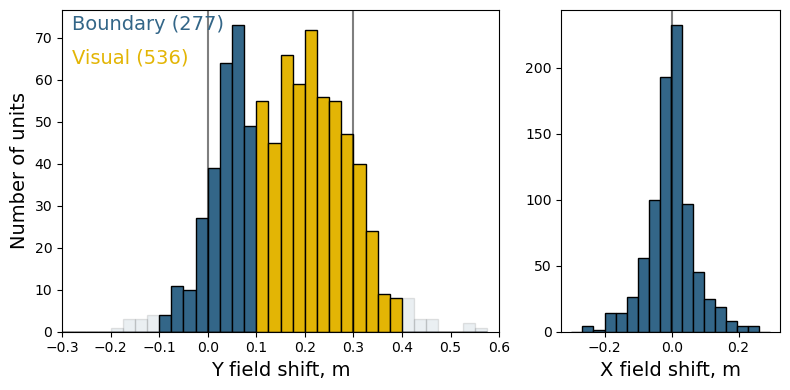

In [12]:
df = shift_A_B_all.copy()
df['shift'] = (-1) * (df['shift'] - 0.3)

df = df[get_idxs_of_good_clu(df)]
df = df[get_idxs_by_quality(df)]

df_00 = df[(df['shift'] > grps['b'][0]) & (df['shift'] < grps['b'][1])]
#df_15 = df[(df['shift'] > grps['h'][0]) & (df['shift'] < grps['h'][1])]
df_30 = df[(df['shift'] > grps['v'][0]) & (df['shift'] < grps['v'][1])]
df_   = df[(df['shift'] < grps['b'][0]) | (df['shift'] > grps['v'][1])]
df_in = df[(df['shift'] > grps['b'][0]) & (df['shift'] < grps['v'][1])]

bins = np.arange(-0.4, 0.6, 0.025)
fig, axs = plt.subplots(1, 2, gridspec_kw={
    'width_ratios': [2, 1]})
fig.set_figheight(4)
fig.set_figwidth(8)

# --------- Y-Axis ----------

ax = axs[0]
ax.set_xlim(-0.3, 0.6)
ax.hist(df_00['shift'], bins=bins, color=COLORS['a'], ec='black')
#ax.hist(df_15['shift'], bins=bins, color=COLORS['c'], ec='black')
ax.hist(df_30['shift'], bins=bins, color=COLORS['d'], ec='black')
ax.hist(df_['shift'],   bins=bins, color=COLORS['a'], ec='black', alpha = 0.1)

ax.axvline(0, color='black', alpha=0.5)
ax.axvline(0.3, color='black', alpha=0.5)
ax.set_xlabel('Y field shift, m', fontsize=14)
ax.set_ylabel('Number of units', fontsize=14)
ax.text(-0.28, 72, 'Boundary (%d)' % len(df_00), fontsize=14, color=COLORS['a'])
#ax.text(-0.28, 64, 'Hybrid (%d)' % len(df_15), fontsize=14, color=COLORS['c'])
ax.text(-0.28, 64, 'Visual (%d)' % len(df_30), fontsize=14, color=COLORS['d'])

ker = scipystats.gaussian_kde(df['shift'], bw_method=0.15)
x_vals = np.linspace(-0.2, 0.5, 100)
#ax.plot(x_vals, 18*ker(x_vals), color='black', alpha=0.5, lw=3, ls='--')

# --------- X-axis -------

ax = axs[1]
ax.hist(df['COMb_x'] - df['COMa_x'], np.arange(-0.3, 0.3, 0.033), color=COLORS['a'], ec='black')
ax.axvline(0.0, color='black', alpha=0.5)
ax.set_xlabel('X field shift, m', fontsize=14)

# old scatter plot
# ax.set_ylim(-0.2, 0.6)
# ax.set_xlabel('Arena Y position, m', fontsize=14)
# ax.set_ylabel('Field shift, m', fontsize=14)
# ax.scatter(df_00['COMa_y'] + 0.15, df_00['shift'], color=COLORS['a'], alpha = 0.5)
# ax.scatter(df_30['COMa_y'] + 0.15, df_30['shift'], color=COLORS['d'], alpha = 0.5)
# ax.scatter(df_15['COMa_y'] + 0.15, df_15['shift'], color=COLORS['c'], alpha = 0.5)
# ax.scatter(df_00['COMb_y'] - 0.15, df_00['shift'], color=COLORS['a'], alpha = 0.5)
# ax.scatter(df_30['COMb_y'] - 0.15, df_30['shift'], color=COLORS['d'], alpha = 0.5)
# ax.scatter(df_15['COMb_y'] - 0.15, df_15['shift'], color=COLORS['c'], alpha = 0.5)
# ax.scatter(df_['COMa_y'] + 0.15, df_['shift'], color=COLORS['a'], facecolors='none', alpha = 0.1)
# ax.scatter(df_['COMb_y'] - 0.15, df_['shift'], color=COLORS['a'], facecolors='none', alpha = 0.1)
# ax.scatter(lon_A_B['COMa_y'] + 0.15, np.zeros(len(lon_A_B)) + 0.4, color=COLORS['d'], facecolors='none', edgecolors=COLORS['d'], alpha = 0.5)
# ax.scatter(lon_B_A['COMa_y'] - 0.15, np.zeros(len(lon_B_A)) + 0.4, color=COLORS['d'], facecolors='none', edgecolors=COLORS['d'], alpha = 0.5)
# ax.axhline(0.3, color='black', alpha=0.5)
# ax.axhline(0.0, color='black', alpha=0.5)

fig.tight_layout()
filename = "1g.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

In [23]:
len(df_00)/len(df), len(df_30)/len(df)  # no hybrid len(df_30)/len(df), len(df)

(0.32781065088757394, 0.6343195266272189)

In [24]:
unit_count = shift_A_B_all.groupby( ['animal', 'session', 'electrode', 'unit'] ).size()
len(unit_count)

1155

### Contribution of each component by animal

In [70]:
sizes_in = pd.DataFrame({'count' : df_in.groupby( ['animal', 'session'] ).size()}).reset_index()
sizes_in = sizes_in.rename(columns={'count': 'count_in'})
sizes_00 = pd.DataFrame({'count' : df_00.groupby( ['animal', 'session'] ).size()}).reset_index()
sizes_00 = sizes_00.rename(columns={'count': 'count_00'})
sizes_15 = pd.DataFrame({'count' : df_15.groupby( ['animal', 'session'] ).size()}).reset_index()
sizes_15 = sizes_15.rename(columns={'count': 'count_15'})
sizes_30 = pd.DataFrame({'count' : df_30.groupby( ['animal', 'session'] ).size()}).reset_index()
sizes_30 = sizes_30.rename(columns={'count': 'count_30'})

sizes = pd.merge(sizes_in, sizes_00, on=('animal', 'session'), how='left')
sizes = pd.merge(sizes, sizes_15, on=('animal', 'session'), how='left')
sizes = pd.merge(sizes, sizes_30, on=('animal', 'session'), how='left')
sizes = sizes.fillna(0)

# sorting
sizes['animal_id'] = sizes.apply(lambda row: animals.index(str(row.animal)), axis=1)
sizes['count_00']  = sizes.apply(lambda row: row.count_00/float(row.count_in), axis=1)
sizes['count_15']  = sizes.apply(lambda row: row.count_15/float(row.count_in), axis=1)
sizes['count_30']  = sizes.apply(lambda row: row.count_30/float(row.count_in), axis=1)
sizes = sizes.sort_values(['animal_id', 'count_00'])
sizes.head()

animal              session  count_in  count_00  count_15  count_30  \
75  00908  2019-07-08_22-15-41         1  0.000000      1.00  0.000000   
79  00908  2019-07-10_17-44-31         2  0.000000      0.50  0.500000   
84  00908  2019-07-16_18-30-55         1  0.000000      0.00  1.000000   
90  00908  2019-07-24_11-17-34        12  0.166667      0.25  0.583333   
74  00908  2019-07-08_17-46-20         4  0.250000      0.00  0.750000   

    animal_id  
75          0  
79          0  
84          0  
90          0  
74          0

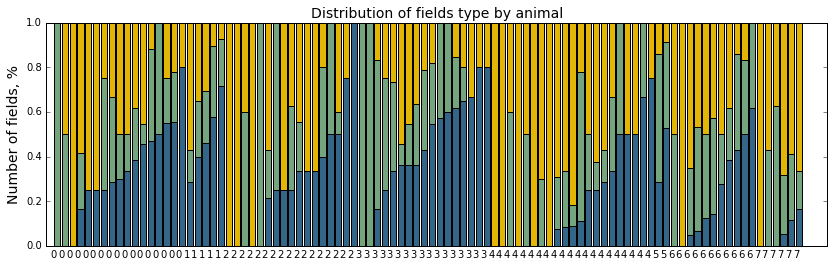

In [71]:
x_vals = np.arange(len(sizes)) + 1
labels = [x for x in sizes['animal_id']]
#sort_idxs = np.argsort(p_00)      # sorting according to the 0-group

fig = figure(figsize=(14, 4))
ax = fig.add_subplot(111)
ax.bar(x_vals, sizes['count_00'], color=COLORS['a'])
ax.bar(x_vals, sizes['count_15'], bottom=sizes['count_00'], color=COLORS['c'])
ax.bar(x_vals, sizes['count_30'], bottom=sizes['count_00'] + sizes['count_15'], color=COLORS['d'])
ax.set_title('Distribution of fields type by animal', fontsize=14)
ax.set_ylabel('Number of fields, %', fontsize=14)
ax.set_xticks(x_vals)
_ = ax.set_xticklabels(labels)  #, rotation='vertical') #, fontsize=14)

In [72]:
sz_an_in = pd.DataFrame({'count' : df_in.groupby( ['animal'] ).size()}).reset_index()
sz_an_in = sz_an_in.rename(columns={'count': 'count_in'})
sz_an_00 = pd.DataFrame({'count' : df_00.groupby( ['animal'] ).size()}).reset_index()
sz_an_00 = sz_an_00.rename(columns={'count': 'count_00'})
sz_an_15 = pd.DataFrame({'count' : df_15.groupby( ['animal'] ).size()}).reset_index()
sz_an_15 = sz_an_15.rename(columns={'count': 'count_15'})
sz_an_30 = pd.DataFrame({'count' : df_30.groupby( ['animal'] ).size()}).reset_index()
sz_an_30 = sz_an_30.rename(columns={'count': 'count_30'})

sz_an = pd.merge(sz_an_in, sz_an_00, on=('animal'), how='left')
sz_an = pd.merge(sz_an, sz_an_15, on=('animal'), how='left')
sz_an = pd.merge(sz_an, sz_an_30, on=('animal'), how='left')
sz_an = sz_an.fillna(0)

# sorting
sz_an['animal_id'] = sz_an.apply(lambda row: animals.index(str(row.animal)), axis=1)
sz_an['count_00']  = sz_an.apply(lambda row: row.count_00/float(row.count_in), axis=1)
sz_an['count_15']  = sz_an.apply(lambda row: row.count_15/float(row.count_in), axis=1)
sz_an['count_30']  = sz_an.apply(lambda row: row.count_30/float(row.count_in), axis=1)
sz_an = sz_an.sort_values(['count_00'])
sz_an

animal  count_in  count_00  count_15  count_30  animal_id
5  005364        60  0.066667  0.316667  0.616667          7
2  003908       108  0.166667  0.240741  0.592593          4
4  005363       121  0.256198  0.330579  0.413223          6
0  003281        97  0.319588  0.226804  0.453608          2
6   00908       146  0.383562  0.260274  0.356164          0
1  003282       160  0.487500  0.275000  0.237500          3
7   00910        80  0.487500  0.237500  0.275000          1
3  003909        41  0.487805  0.414634  0.097561          5

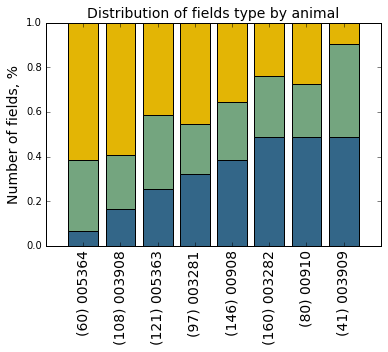

In [73]:
x_vals = np.arange(len(sz_an)) + 1
labels = ['(%s) %s' % (x[1]['count_in'], x[1]['animal']) for x in sz_an.iterrows()]
#labels = [x for x in sz_an.iterrows()]

fig = figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.bar(x_vals, sz_an['count_00'], color=COLORS['a'], align='center')
ax.bar(x_vals, sz_an['count_15'], bottom=sz_an['count_00'], color=COLORS['c'], align='center')
ax.bar(x_vals, sz_an['count_30'], bottom=sz_an['count_00'] + sz_an['count_15'], color=COLORS['d'], align='center')
ax.set_title('Distribution of fields type by animal', fontsize=14)
ax.set_ylabel('Number of fields, %', fontsize=14)
ax.set_xticks(x_vals)
#ax.set_xlim(1, len(x_vals) + 1)
_ = ax.set_xticklabels(labels, rotation='vertical', fontsize=14)

filename = "E_4a.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

In [74]:
# percentage outliers
len(df_)/float(len(df))

0.0378698224852071

In [75]:
# for comparison with vSHIFT visual
#idxs = get_idxs_by_quality(shift_A_B_all)
#data = (-1) * (np.array(shift_A_B_all[idxs]['shift']) - 0.3)
hist_phy, edges = np.histogram(df['shift'], bins=50, range=(-0.4, 0.6))
hist_phy

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  3,  1,  4,  1,  9,
        8,  9, 25, 29, 48, 61, 48, 39, 43, 40, 47, 51, 44, 61, 46, 46, 44,
       33, 37, 22, 10,  5,  7,  6,  4,  3,  1,  0,  0,  0,  2,  2,  1])

### Shift relative to the boudary - all

In [4]:
df = shift_A_B_all.copy()
df['shift'] = (-1) * (df['shift'] - 0.3)

df = df[get_idxs_of_good_clu(df)]
df = df[get_idxs_by_quality(df)]

dist_to_b = -1 * (np.abs(np.concatenate([df['COMa_y'] + 0.15, df['COMb_y'] - 0.15])) - 0.85)  # Y-positions of each field in A/B rel to boundary
f_shift = np.tile(df['shift'], 2)

NameError: name 'shift_A_B_all' is not defined

In [2]:
len(dist_to_b), len(f_shift)

NameError: name 'dist_to_b' is not defined

In [27]:
means, medians, stds, stde, intervals = [], [], [], [], []
bins = np.linspace(0, 0.85, 12)
for i in range(len(bins) - 1):
    idxs = np.where((dist_to_b > bins[i]) & (dist_to_b < bins[i+1]))[0]
    k_slice = f_shift[idxs]
    
    means.append(np.mean(k_slice))
    medians.append(np.median(k_slice))
    stds.append(np.std(k_slice))
    stde.append(scipystats.sem(k_slice))
    
    j_min, j_max = scipystats.t.interval(0.95, len(k_slice)-1, loc=np.median(k_slice), scale=scipystats.sem(k_slice))
    intervals.append([j_min, j_max])
    
intervals = np.array(intervals)
means = np.array(means)
medians = np.array(medians)
stds = np.array(stds)

slope, intercept, r_value, p_value, std_err = scipystats.linregress(dist_to_b, f_shift)
#st, pv = scipystats.kruskal(x_vals, y_vals)

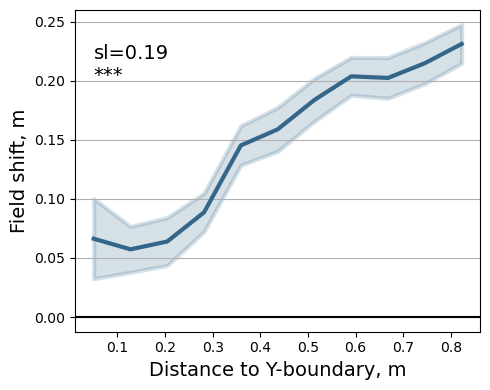

In [28]:
fig = figure(figsize=(5, 4))

offset = 0.05
ax = fig.add_subplot(111)
ax.plot(bins[:-1] + offset, medians, lw=3, color=COLORS['a'])
ax.fill_between(bins[:-1] + offset, intervals[:, 0], intervals[:, 1], lw=3, alpha=0.2, color=COLORS['a'])
#ax.fill_between(bins[:-1] + offset, medians - stds, medians + stds, lw=3, alpha=0.2, color=COLORS['a'])
ax.yaxis.grid()
ax.set_xlabel('Distance to Y-boundary, m', fontsize=14)
ax.set_ylabel('Field shift, m', fontsize=14)
ax.axhline(0, color='black')
ax.text(0.05, 0.2, 'sl=%.2f\n***' % slope, fontsize=14)
#ax.set_xlim(0, 0.9)
#ax.set_ylim(0.0, 0.4)
#ax.scatter(dist_to_b, f_shift, alpha=0.2, color=COLORS['a'])

fig.tight_layout()
filename = "1h.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

### Shift relative to the boundary

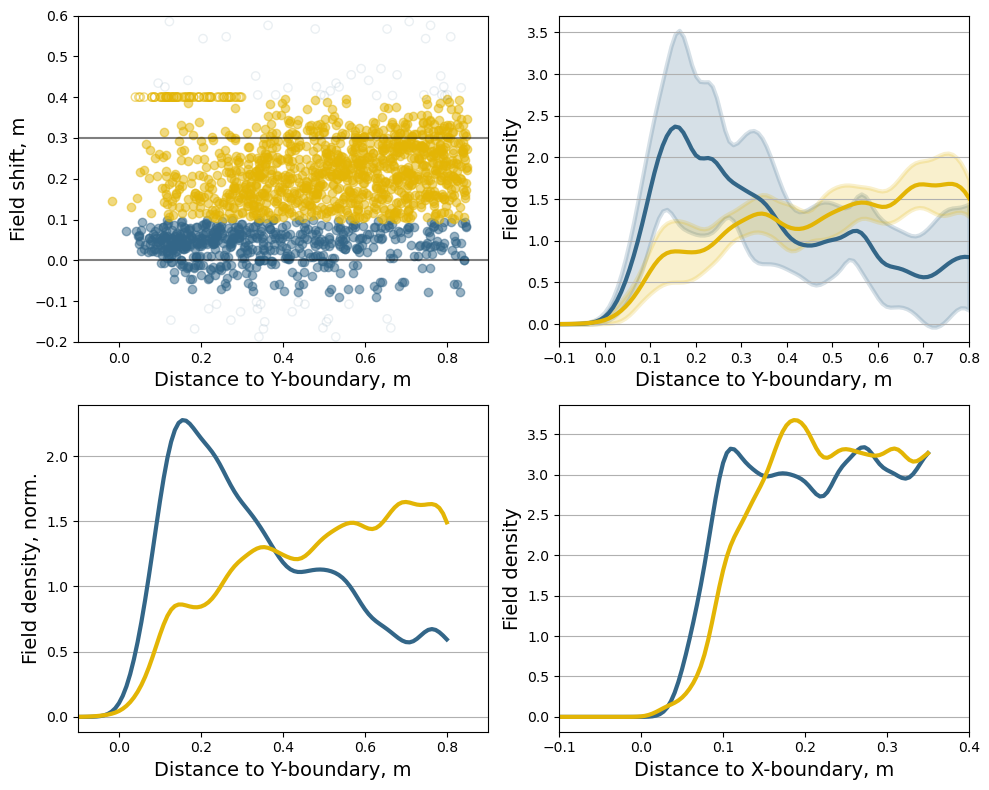

In [31]:
dfb_00  = -1 * (np.abs(np.concatenate([df_00['COMa_y'] + 0.15, df_00['COMb_y'] - 0.15])) - 0.85)
#dfb_15  = -1 * (np.abs(np.concatenate([df_15['COMa_y'] + 0.15, df_15['COMb_y'] - 0.15])) - 0.85)
dfb_30  = -1 * (np.abs(np.concatenate([df_30['COMa_y'] + 0.15, df_30['COMb_y'] - 0.15])) - 0.85)
dfb_    = -1 * (np.abs(np.concatenate([df_['COMa_y'] + 0.15, df_['COMb_y'] - 0.15])) - 0.85)
dfb_lon = -1 * (np.abs(np.concatenate([lon_A_B['COMa_y'] + 0.15, lon_B_A['COMa_y'] - 0.15])) - 0.85)

fig = figure(figsize=(10, 8))

# scatter plot of fields
ax = fig.add_subplot(221)
ax.set_ylim(-0.2, 0.6)
ax.set_xlim(-0.1, 0.9)
#ax.set_xlabel('Distance to boundary, m', fontsize=14)
ax.set_ylabel('Field shift, m', fontsize=14)
ax.set_xlabel('Distance to Y-boundary, m', fontsize=14)
ax.scatter(dfb_00, np.tile(df_00['shift'], 2), color=COLORS['a'], alpha = 0.5)
#ax.scatter(dfb_15, np.tile(df_15['shift'], 2), color=COLORS['c'], alpha = 0.5)
ax.scatter(dfb_30, np.tile(df_30['shift'], 2), color=COLORS['d'], alpha = 0.5)
ax.scatter(dfb_, np.tile(df_['shift'], 2), color=COLORS['a'], alpha = 0.1, facecolors='none')
ax.scatter(dfb_lon, np.zeros(len(dfb_lon)) + 0.4, color=COLORS['d'], alpha = 0.5, facecolors='none', edgecolors=COLORS['d'])
ax.axhline(0.3, color='black', alpha=0.5)
ax.axhline(0.0, color='black', alpha=0.5)


# KDE for groups
ax = fig.add_subplot(223)
#ax.set_ylim(-0.2, 0.6)
ax.set_xlim(-0.1, 0.9)
ax.set_xlabel('Distance to Y-boundary, m', fontsize=14)
ax.set_ylabel('Field density, norm.', fontsize=14)

ker_00 = scipystats.gaussian_kde(dfb_00, bw_method=0.15)
#ker_15 = scipystats.gaussian_kde(dfb_15, bw_method=0.15)
#ker_30 = scipystats.gaussian_kde(dfb_30, bw_method=0.15)
ker_30 = scipystats.gaussian_kde(np.concatenate([dfb_30, dfb_lon]), bw_method=0.15)
x_vals = np.linspace(-0.1, 0.8, 100)
ax.plot(x_vals, ker_00(x_vals), color=COLORS['a'], lw=3)
#ax.plot(x_vals, ker_15(x_vals), color=COLORS['c'], lw=3)
ax.plot(x_vals, ker_30(x_vals), color=COLORS['d'], lw=3)
ax.yaxis.grid()


# with CI
anims = ['00908', '00910', '003281', '003282', '003908', '003909', '005363', '005364']
dfb_00s = [-1 * (np.abs(np.concatenate([df_00[df_00['animal']==animal]['COMa_y'] + 0.15, df_00[df_00['animal']==animal]['COMb_y'] - 0.15])) - 0.85) for animal in anims]
#dfb_15s = [-1 * (np.abs(np.concatenate([df_15[df_15['animal']==animal]['COMa_y'] + 0.15, df_15[df_15['animal']==animal]['COMb_y'] - 0.15])) - 0.85) for animal in anims]
dfb_30s = [-1 * (np.abs(np.concatenate([df_30[df_30['animal']==animal]['COMa_y'] + 0.15, df_30[df_30['animal']==animal]['COMb_y'] - 0.15])) - 0.85) for animal in anims]
dfb_lns = [-1 * (np.abs(np.concatenate([lon_A_B[lon_A_B['animal']==animal]['COMa_y'] + 0.15, lon_B_A[lon_B_A['animal']==animal]['COMa_y'] - 0.15])) - 0.85) for animal in anims]

# merge lonely
dfb_30s = [np.concatenate([dfb_30s[i], dfb_lns[i]]) for i in range(len(dfb_30s))]
x_vals = np.linspace(-0.1, 0.8, 100)
colors = [COLORS['a'], COLORS['d']]  # COLORS['c'], 

ax = fig.add_subplot(222)
ax.set_xlabel('Distance to Y-boundary, m', fontsize=14)
ax.set_ylabel('Field density', fontsize=14)
ax.set_xlim(-0.1, 0.8)
ax.yaxis.grid()
for i, dfbs in enumerate([dfb_00s, dfb_30s]):  # dfb_15s, 

    y_vals_all = []
    for dbf_i in dfbs:
        ker_i = scipystats.gaussian_kde(dbf_i, bw_method=0.15)
        y_vals_all.append(ker_i(x_vals))
        #plt.plot(x_vals, y_vals)
    y_vals_all = np.array(y_vals_all)  # all profiles for a particular shift (0, 0.15, 0.3)

    intervals = []
    for j in range(y_vals_all.shape[1]):
        k_slice = y_vals_all[:, j]
        j_min, j_max = scipystats.t.interval(0.95, len(k_slice)-1, loc=np.mean(k_slice), scale=scipystats.sem(k_slice))
        intervals.append([j_min, j_max])

    intervals = np.array(intervals)
    mean = y_vals_all.mean(axis=0)
    
    ax.plot(x_vals, mean, lw=3, color=colors[i])
    ax.fill_between(x_vals, intervals[:, 0], intervals[:, 1], lw=3, color=colors[i], alpha=0.2)
    
    
# X-distribution
dfb_00  = -1 * (np.abs(np.concatenate([df_00['COMa_x'], df_00['COMb_x']])) - 0.4)
#dfb_15  = -1 * (np.abs(np.concatenate([df_15['COMa_x'], df_15['COMb_x']])) - 0.4)
dfb_30  = -1 * (np.abs(np.concatenate([df_30['COMa_x'], df_30['COMb_x']])) - 0.4)
dfb_    = -1 * (np.abs(np.concatenate([df_['COMa_x'], df_['COMb_x']])) - 0.4)
dfb_lon = -1 * (np.abs(np.concatenate([lon_A_B['COMa_x'], lon_B_A['COMa_x']])) - 0.4)

ax = fig.add_subplot(224)
ax.set_xlim(-0.1, 0.4)
ax.set_xlabel('Distance to X-boundary, m', fontsize=14)
ax.set_ylabel('Field density', fontsize=14)

ker_00 = scipystats.gaussian_kde(dfb_00, bw_method=0.15)
#ker_15 = scipystats.gaussian_kde(dfb_15, bw_method=0.15)
#ker_30 = scipystats.gaussian_kde(dfb_30, bw_method=0.15)
ker_30 = scipystats.gaussian_kde(np.concatenate([dfb_30, dfb_lon]), bw_method=0.15)
x_vals = np.linspace(-0.1, 0.35, 100)
ax.plot(x_vals, ker_00(x_vals), color=COLORS['a'], lw=3)
#ax.plot(x_vals, ker_15(x_vals), color=COLORS['c'], lw=3)
ax.plot(x_vals, ker_30(x_vals), color=COLORS['d'], lw=3)
ax.yaxis.grid()

fig.tight_layout()
filename = "1i.pdf"
#fig.savefig(os.path.join(os.path.join(paper), filename))

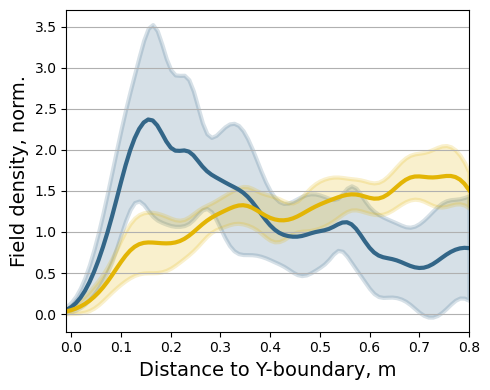

In [33]:
fig = figure(figsize=(5, 4))
ax = fig.add_subplot(111)
ax.set_xlabel('Distance to Y-boundary, m', fontsize=14)
ax.set_ylabel('Field density, norm.', fontsize=14)
ax.set_xlim(-0.01, 0.8)
ax.yaxis.grid()

x_vals = np.linspace(-0.1, 0.8, 100)

for i, dfbs in enumerate([dfb_00s, dfb_30s]):

    y_vals_all = []
    for dbf_i in dfbs:
        ker_i = scipystats.gaussian_kde(dbf_i, bw_method=0.15)
        y_vals_all.append(ker_i(x_vals))
        #plt.plot(x_vals, y_vals)
    y_vals_all = np.array(y_vals_all)  # all profiles for a particular shift (0, 0.15, 0.3)

    intervals = []
    for j in range(y_vals_all.shape[1]):
        k_slice = y_vals_all[:, j]
        j_min, j_max = scipystats.t.interval(0.95, len(k_slice)-1, loc=np.mean(k_slice), scale=scipystats.sem(k_slice))
        intervals.append([j_min, j_max])

    intervals = np.array(intervals)
    mean = y_vals_all.mean(axis=0)
    
    ax.plot(x_vals, mean, lw=3, color=colors[i])
    ax.fill_between(x_vals, intervals[:, 0], intervals[:, 1], lw=3, color=colors[i], alpha=0.2)


fig.tight_layout()
filename = "1i.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

### Vr Influence score - each session version

In [232]:
dist = 0.45

# only A condition (add B)
df_00_b = df_00[(df_00['COMa_y'] + 0.15 < -dist) | (df_00['COMa_y'] + 0.15 > dist)]
df_30_b = df_30[(df_30['COMa_y'] + 0.15 < -dist) | (df_30['COMa_y'] + 0.15 > dist)]
df_00_v = df_00[(df_00['COMa_y'] + 0.15 > -dist) & (df_00['COMa_y'] + 0.15 < dist)]
df_30_v = df_30[(df_30['COMa_y'] + 0.15 > -dist) & (df_30['COMa_y'] + 0.15 < dist)]

infl_ds = []
col_names = ['count_00_b', 'count_30_b', 'count_00_v', 'count_30_v']
for i, ds in enumerate([df_00_b, df_30_b, df_00_v, df_30_v]):
    #result = pd.DataFrame({'count' : ds.groupby(['animal', 'session']).size()}).reset_index()
    result = pd.DataFrame({'count' : ds.groupby(['animal']).size()}).reset_index()
    result = result.rename(columns={'count': col_names[i]})
    infl_ds.append(result)
    
#infl_table = pd.DataFrame({'count' : df.groupby(['animal', 'session']).size()}).reset_index()
infl_table = pd.DataFrame({'count' : df.groupby(['animal']).size()}).reset_index()
infl_table = infl_table.rename(columns={'count': 'count_all'})
for ds in infl_ds:
    #infl_table = pd.merge(infl_table, ds, on=('animal', 'session'), how='left')
    infl_table = pd.merge(infl_table, ds, on=('animal'), how='left')
    
it = infl_table.fillna(0)
# only animals with enough stats
it = it[(it['count_00_b'] > 0) & (it['count_30_b'] > 0) & (it['count_00_v'] > 0) & (it['count_30_v'] > 0)]

it['infl_near']  = it.apply(lambda row: row.count_30_b/(float(row.count_00_b) + float(row.count_30_b)), axis=1)
it['infl_far']   = it.apply(lambda row: row.count_30_v/(float(row.count_00_v) + float(row.count_30_v)), axis=1)

n=8, p-val=0.012


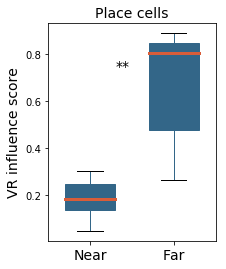

In [233]:
st, pv = scipystats.wilcoxon(it['infl_near'], it['infl_far'])

fig = figure(figsize=(3, 4))
ax = fig.add_subplot(111)

c = COLORS['a']
data = (it['infl_near'], it['infl_far'])
bp = ax.boxplot(data, labels=['Near', 'Far'], widths=0.6, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color='black'),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=COLORS['b'],linewidth=3),
            showfliers=False)

ax.tick_params(axis='x', labelsize=14)
ax.set_ylabel('VR influence score', fontsize=14)
#ax.set_xlabel('Distance to boundary', fontsize=14)
ax.set_title('Place cells', fontsize=14)
ax.text(1.3, ax.get_ylim()[1] - 0.2, '**', fontsize=14)
#for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
#        plt.setp(box1[item], color=c2)
#plt.setp(box1["boxes"], facecolor=c2)
#plt.setp(box1["fliers"], markeredgecolor=c2)
print("n=%d, p-val=%.3f" % (len(it), pv))

### Field sizes (pSHIFT, A)

In [13]:
# physical
visual = False
shift_AB_sizes = get_fields_between_epochs(source, s_list_with_dark, 'A', 'B')
#shift_AB_sizes = get_fields_between_epochs(source, s_list_all, 'A', 'B')
#shift_AB_sizes = get_fields_between_epochs(source, s_list_single, 'A', 'B')


# visual
#visual = True
#s_list_l = get_sessions_list(source, animals, 'SHIFT visual')
#s_list_d = get_sessions_list(source, animals, 'SHIFT visual +dark')
#s_list_all = list(s_list_l) + list(s_list_d)
#shift_AB_sizes = get_fields_between_epochs(source, s_list_d, 'A', 'B')

df = shift_AB_sizes.copy()
if not visual:
    df['shift'] = (-1) * (df['shift'] - 0.3)

df = df[get_idxs_of_good_clu(df)]
df = df[get_idxs_by_quality(df)]
delta = 0.075

df_00 = df[(df['shift'] > -delta) & (df['shift'] < delta)]
df_15 = df[(df['shift'] > 0.15 - delta) & (df['shift'] < 0.15 + delta)]
df_30 = df[(df['shift'] > 0.30 - delta) & (df['shift'] < 0.30 + delta)]
df_   = df[(df['shift'] < -delta) | (df['shift'] > 0.3 + delta)]
df_in = df[(df['shift'] > -delta) & (df['shift'] < 0.3 + delta)]

df_lon = -1 * (np.abs(np.concatenate([lon_A_B['COMa_y'] + 0.15, lon_B_A['COMa_y'] - 0.15])) - 0.85)


collected = []
bins = np.linspace(0, 0.8, 15)
out = {}
for i, dfx in enumerate([df_00, df_15, df_30]):
    size_avg = []
    for j, bin_n in enumerate(bins[:-1]):
        if visual:
            sel_A = dfx[(-1*(np.abs(dfx['COMa_y']) - 0.85) > bins[j]) & (-1*(np.abs(dfx['COMa_y']) - 0.85) < bins[j+1])]
        else:
            sel_A = dfx[(-1*(np.abs(dfx['COMa_y'] + 0.15) - 0.85) > bins[j]) & (-1*(np.abs(dfx['COMa_y'] + 0.15) - 0.85)  < bins[j+1])]
            sel_B = dfx[(-1*(np.abs(dfx['COMb_y'] - 0.15) - 0.85) > bins[j]) & (-1*(np.abs(dfx['COMb_y'] - 0.15) - 0.85)  < bins[j+1])]
            #size_avg.append( (sel_A['size_A'].mean() + sel_B['size_B'].mean())/2 )
        
#         if i == 3: # add lonely
#             l_A = lon_A_B[(-1*(np.abs(lon_A_B['COMa_y'] + 0.15) - 0.85) > bins[j]) & (-1*(np.abs(lon_A_B['COMa_y'] + 0.15) - 0.85) < bins[j+1])]
#             l_B = lon_B_A[(-1*(np.abs(lon_B_A['COMa_y'] - 0.15) - 0.85) > bins[j]) & (-1*(np.abs(lon_B_A['COMa_y'] - 0.15) - 0.85) < bins[j+1])]
#             res = np.concatenate([l_A['size'], l_B['size'], sel_A['size_A']]).mean()
#         else:
        res = sel_A['size_A'].mean()
        size_avg.append(res)
        out[i] = out[i] .append

    collected.append(size_avg)
    
# get rid of nans
fsizes = []
for cl in collected:
    y = np.array(cl)
    nans, x = np.isnan(y), lambda z: z.nonzero()[0]
    y[nans] = np.interp(x(nans), x(~nans), y[~nans])
    fsizes.append(y)

No required H5 file found for 2020-10-23_12-57-03
PF match found for 796 fields from total 1553 A and 1551 B fields


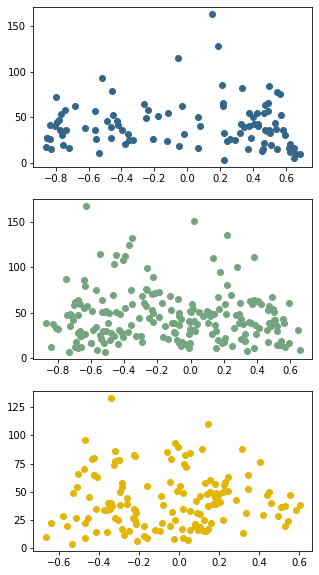

In [20]:
fig = figure(figsize=(5, 10))

ax = fig.add_subplot(311)
ax.scatter(df_00['COMa_y'], df_00['size_A'], color=COLORS['a'])

ax = fig.add_subplot(312)
ax.scatter(df_15['COMa_y'], df_15['size_A'], color=COLORS['c'])

ax = fig.add_subplot(313)
ax.scatter(df_30['COMa_y'], df_30['size_A'], color=COLORS['d'])

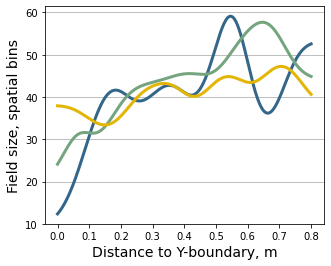

In [14]:
fig = figure(figsize=(5, 4))

ax = fig.add_subplot(111)
clrs = ('a', 'c', 'd')
kernel_1D = signal.gaussian(100, std=15)
for i, sizes in enumerate(fsizes):
    x_new = np.linspace(0, 0.8, 300)
    f = interpolate.interp1d(np.linspace(0, 0.8, len(sizes)), sizes)
    y_new = np.concatenate([np.ones(100)*sizes[0], f(x_new), np.ones(100)*sizes[-1]])
    y_new = np.convolve(y_new, kernel_1D, 'same') / kernel_1D.sum()
    y_new = y_new[100:-100]
    #a_BSpline = interpolate.make_interp_spline(np.linspace(0, 0.8, len(sizes)), sizes)
    #y_new = a_BSpline(x_new)
    #ax.plot(x_new, y_new, color=COLORS[clrs[i]], lw=3)
    #ax.plot(x_new, f(x_new), color=COLORS[clrs[i]], lw=3)
    ax.plot(x_new, y_new, color=COLORS[clrs[i]], lw=3)

#ax.set_xlim(0, 0.8)
ax.set_xlabel('Distance to Y-boundary, m', fontsize=14)
ax.set_ylabel('Field size, spatial bins', fontsize=14)
ax.yaxis.grid()

In [85]:
sizes

array([38.        , 38.        , 32.4       , 45.33333333, 41.5       ,
       43.        , 45.16666667, 35.4       , 43.33333333, 46.95652174,
       47.84210526, 48.95454545, 46.35      , 42.21052632])

### Double-field cells

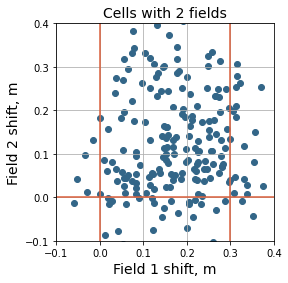

In [130]:
doubles = df.groupby(['animal', 'session', 'electrode', 'unit']).filter(lambda x: len(x) == 2)['shift']

fig = figure(figsize=(4, 4))
ax = fig.add_subplot(111)
ax.scatter(doubles.iloc[::2], doubles.iloc[1::2], color=COLORS['a'])
ax.set_aspect('equal')
ax.set_xlim(-0.1, 0.4)
ax.set_ylim(-0.1, 0.4)
ax.axhline(0, color=COLORS['b'])
ax.axvline(0, color=COLORS['b'])
ax.axvline(0.3, color=COLORS['b'])
ax.set_title('Cells with 2 fields', fontsize=14)
ax.set_xlabel('Field 1 shift, m', fontsize=14)
ax.set_ylabel('Field 2 shift, m', fontsize=14)
ax.grid()

### Single / periodic comparison

In [18]:
shift_single = get_fields_between_epochs(source, s_list_single, 'A', 'B')
shift_period = get_fields_between_epochs(source, s_list_periodic_all, 'A', 'B')

No required H5 file found for 2020-10-23_12-57-03
PF match found for 332 fields from total 628 A and 646 B fields
PF match found for 1188 fields from total 2418 A and 2386 B fields


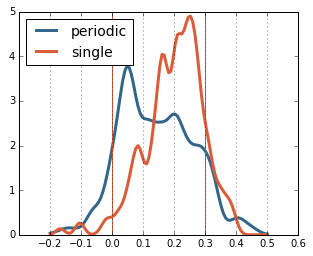

In [201]:
df_s = shift_single.copy()
df_s['shift'] = (-1) * (df_s['shift'] - 0.3)
df_s = df_s[get_idxs_of_good_clu(df_s)]
df_s = df_s[get_idxs_by_quality(df_s)]
df_p = shift_period.copy()
df_p['shift'] = (-1) * (df_p['shift'] - 0.3)
df_p = df_p[get_idxs_of_good_clu(df_p)]
df_p = df_p[get_idxs_by_quality(df_p)]

delta = 0.075

bins = np.arange(-0.4, 0.6, 0.025)
fig = figure(figsize=(5, 4))

ax = fig.add_subplot(111)
ax.set_xlim(-0.3, 0.6)

ker_s = scipystats.gaussian_kde(df_s['shift'], bw_method=0.15)
ker_p = scipystats.gaussian_kde(df_p['shift'], bw_method=0.15)
x_vals = np.linspace(-0.2, 0.5, 100)
ax.plot(x_vals, ker_p(x_vals), color=COLORS['a'], lw=3, ls='-', label='periodic')
ax.plot(x_vals, ker_s(x_vals), color=COLORS['b'], lw=3, ls='-', label='single')
ax.axvline(0, color=COLORS['b'])
ax.axvline(0.3, color=COLORS['b'])
ax.xaxis.grid()
ax.legend(loc='upper left', fontsize=14)

### Taking sessions with dark: recalibration when visual r.f. is removed

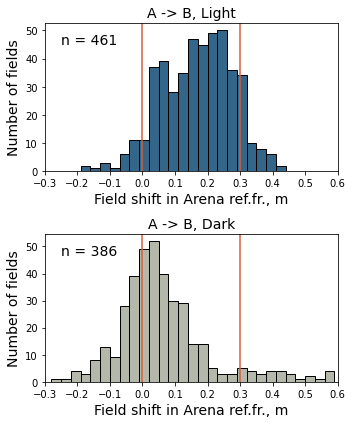

In [26]:
shifts =[]
for ds in [shift_A_B, shift_Ad_Bd]:
    df_l = ds.copy()
    df_l['shift'] = (-1) * (df_l['shift'] - 0.3)
    df_l = df_l[get_idxs_of_good_clu(df_l)]
    df_l = df_l[get_idxs_by_quality(df_l)]
    shifts.append(df_l['shift'])
    
shifts_l, shifts_d = shifts[0], shifts[1]
bins = np.arange(-0.4, 0.6, 0.03)
colors = (COLORS['a'], COLORS['f'])
titles = ('A -> B, Light', 'A -> B, Dark')

fig = figure(figsize=(5, 6))
for i, data in enumerate([shifts_l, shifts_d]):
    ax = fig.add_subplot(2, 1, i+1)
    ax.set_xlim(-0.3, 0.6)
    ax.hist(data, bins=bins, color=colors[i], ec='black')
    ax.axvline(0, color=COLORS['b'])
    ax.axvline(0.3, color=COLORS['b'])
    ax.set_xlabel('Field shift in Arena ref.fr., m', fontsize=14)
    ax.set_ylabel('Number of fields', fontsize=14)
    ax.text(-0.25, 0.9 * np.histogram(data, bins)[0].max(), 'n = %d' % len(data), fontsize=14)
    ax.set_title(titles[i], fontsize=14)

fig.tight_layout()
#filename = "02-vSHIFT_histogram_light-dark.png"
#fig.savefig(os.path.join(os.path.join(paper), filename))

### proportion of fields that keep their fields in dark

In [27]:
dest = '/home/andrey/storage2/andrey/data/projects/24_shift/debug'
from shutil import copyfile

In [28]:
# match stats
match_both, match_both_X = [], []
match_A_Ad, match_A_Ad_X = [], []
match_B_Bd, match_B_Bd_X = [], []
match_none, match_none_X = [], []
match_none_idxs = []

def get_match_idxs(dataset, row):
    idxs_1 = (dataset['session'] == row['session'])
    idxs_2 = (dataset['electrode'] == row['electrode'])
    idxs_3 = (dataset['unit'] == row['unit'])
    idxs_4 = (dataset['field_A'] == row['field_A'])
    return idxs_1 & idxs_2 & idxs_3 & idxs_4

ds_filt = shift_A_B.copy()
ds_filt = ds_filt[get_idxs_of_good_clu(ds_filt)]
ds_filt = ds_filt[get_idxs_by_quality(ds_filt)]
for i, row in ds_filt.iterrows():
    # for each matched pair in light (A, B) search for pair in dark (A, Ad and B, Bd)
    idxs_A = get_match_idxs(shift_A_Ad, row)
    idxs_B = get_match_idxs(shift_B_Bd, row)
    
    if idxs_A.any() and idxs_B.any():
        match_both.append(row['shift'])
        match_both_X.append(row['COMb_x'] - row['COMa_x'])
    elif idxs_A.any():
        match_A_Ad.append(row['shift'])
        match_A_Ad_X.append(row['COMb_x'] - row['COMa_x'])
    elif idxs_B.any():
        match_B_Bd.append(row['shift'])
        match_B_Bd_X.append(row['COMb_x'] - row['COMa_x'])
    else:
        match_none.append(row['shift'])
        match_none_X.append(row['COMb_x'] - row['COMa_x'])
                
        #f_path = os.path.join(source, row['animal'], row['session'], 'analysis', 'placefields')
        #f_name = '%s_%s_%s_%s.png' % (row['animal'], row['session'], row['electrode'], row['unit'])
        #copyfile(os.path.join(f_path, f_name), os.path.join(dest, f_name))

[404, 57]


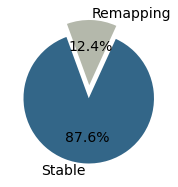

In [39]:
data = [len(match_both) + len(match_A_Ad) + len(match_B_Bd), len(match_none)]
labels = 'Stable', 'Remapping'
colors = [COLORS['a'], COLORS['f'], COLORS['b']]
explode = (0, 0.2)

fig = figure(figsize=(3, 3))
ax = fig.add_subplot(111)

wedges, labels, autopct = ax.pie(data, explode=explode, colors=colors, labels=labels, \
             autopct='%1.1f%%', textprops={'fontsize': 14}, startangle=110)
for lab in labels:
    lab.set_fontsize(14)
    
print(data)    
filename = "2c.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

In [49]:
np.array(data).sum(), data

(461, [404, 57])

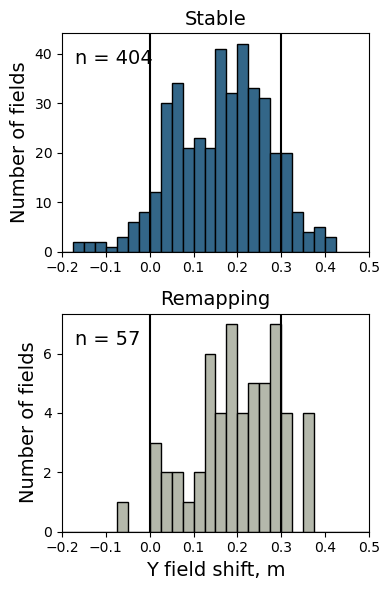

In [37]:
stable_all = -1 * (np.concatenate([np.array(match_both), np.array(match_A_Ad), np.array(match_B_Bd)]) - 0.3)
unstable_all = -1 * (np.array(match_none) - 0.3)

# plt.hist(-1 * (stable_all - 0.3), bins, color=COLORS['a'], density=True)
# plt.hist(-1 * (unstable_all - 0.3), bins, color=COLORS['f'], density=True, alpha=0.5)

bins = np.arange(-0.4, 0.6, 0.025)
colors = (COLORS['a'], COLORS['f'])
titles = ('Stable', 'Remapping')

fig = figure(figsize=(4, 6))
for i, data in enumerate([stable_all, unstable_all]):
    ax = fig.add_subplot(2, 1, i+1)
    ax.set_xlim(-0.2, 0.5)
    ax.hist(data, bins=bins, color=colors[i], ec='black')
    ax.axvline(0, color='black')
    ax.axvline(0.3, color='black')
    if i > 0:
        ax.set_xlabel('Y field shift, m', fontsize=14)
    ax.set_ylabel('Number of fields', fontsize=14)
    ax.text(-0.17, 0.9 * np.histogram(data, bins)[0].max(), 'n = %d' % len(data), fontsize=14)
    ax.set_title(titles[i], fontsize=14)

fig.tight_layout()

filename = "2d_1.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

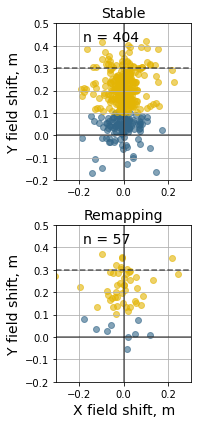

In [45]:
# stable / remapping as scatterplots

stable_all     = -1 * (np.concatenate([np.array(match_both), np.array(match_A_Ad), np.array(match_B_Bd)]) - 0.3)
stable_all_X   = np.concatenate([np.array(match_both_X), np.array(match_A_Ad_X), np.array(match_B_Bd_X)])
unstable_all   = -1 * (np.array(match_none) - 0.3)
unstable_all_X = np.array(match_none_X)

# plt.hist(-1 * (stable_all - 0.3), bins, color=COLORS['a'], density=True)
# plt.hist(-1 * (unstable_all - 0.3), bins, color=COLORS['f'], density=True, alpha=0.5)

bins = np.arange(-0.4, 0.6, 0.025)
colors = (COLORS['a'], COLORS['f'])
titles = ('Stable', 'Remapping')

fig = figure(figsize=(3, 6))
for i, (d_y, d_x) in enumerate([[stable_all, stable_all_X], [unstable_all, unstable_all_X]]):
    ax = fig.add_subplot(2, 1, i+1)
    ax.set_ylim(-0.2, 0.5)
    ax.set_xlim(-0.3, 0.3)
    ax.scatter(d_x[d_y < 0.1], d_y[d_y < 0.1], color=COLORS['a'], alpha=0.6)
    ax.scatter(d_x[d_y > 0.1], d_y[d_y > 0.1], color=COLORS['d'], alpha=0.6)
    #ax.scatter(d_x, d_y, color=colors[i], alpha=0.6)
    ax.axvline(0, color='black', alpha=0.6)
    ax.axhline(0, color='black', alpha=0.6)
    ax.axhline(0.3, color='black', ls='--', alpha=0.6)
    if i > 0:
        ax.set_xlabel('X field shift, m', fontsize=14)
    ax.set_ylabel('Y field shift, m', fontsize=14)
    ax.text(-0.18, 0.42, 'n = %d' % len(d_y), fontsize=14)
    ax.set_title(titles[i], fontsize=14)
    ax.set_aspect('equal')
    ax.grid()

fig.tight_layout()

filename = "2d_1a.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

(4.851773899194313, 0.02761771567877036)

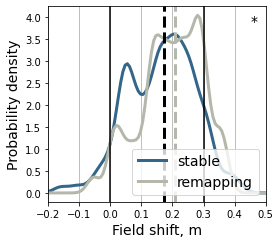

In [46]:
# KDE plot
fig = figure(figsize=(4, 3.5))

ax = fig.add_subplot(111)
#ax.set_xlim(-0.2, 0.5)

ker_s = scipystats.gaussian_kde(stable_all, bw_method=0.2)
ker_r = scipystats.gaussian_kde(unstable_all, bw_method=0.2)
x_vals = np.linspace(-0.2, 0.5, 100)
ax.plot(x_vals, ker_s(x_vals), color=COLORS['a'], lw=3, label='stable')
ax.plot(x_vals, ker_r(x_vals), color=COLORS['f'], lw=3, label='remapping')
ax.axvline(0, color='black')
ax.axvline(0.3, color='black')
ax.axvline(np.median(np.array(stable_all)), color='black', lw=3, ls='--')
ax.axvline(np.median(np.array(unstable_all)), color=COLORS['f'], lw=3, ls='--')
ax.set_xlabel('Field shift, m', fontsize=14)
ax.set_ylabel('Probability density', fontsize=14)
ax.text(0.45, 3.8, '*', fontsize=14)
ax.xaxis.grid()
ax.set_xlim(-0.2, 0.5)
ax.legend(loc='lower right', fontsize=14)    
fig.tight_layout()

st, pval = scipystats.kruskal(np.array(stable_all), np.array(unstable_all))
#st, pval = scipystats.ks_2samp(np.array(stable_all), np.array(unstable_all))

filename = "2d_2.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))
st, pval

### Argument 1: recalibration of the spatial encoding in STABLE cells suggests weighted integration

In [83]:
# select stable fields OPTION 1
df_AB = shift_A_B[get_idxs_of_good_clu(shift_A_B)]
df_AB = df_AB[get_idxs_by_quality(df_AB)]

df_BAd = shift_B_Ad[get_idxs_of_good_clu(shift_B_Ad)]
df_BAd = df_BAd[get_idxs_by_quality(df_BAd)]

df_AdBd = shift_Ad_Bd[get_idxs_of_good_clu(shift_Ad_Bd)]
df_AdBd = df_AdBd[get_idxs_by_quality(df_AdBd)]

df_ABAd = df_AB.merge(df_BAd, left_on=['animal', 'session', 'electrode', 'unit', 'field_B'], \
        right_on=['animal', 'session', 'electrode', 'unit', 'field_A'], suffixes=('_l', '_Ad'), how='inner')
df_ABAdBd = df_ABAd.merge(df_AdBd, left_on=['animal', 'session', 'electrode', 'unit', 'field_B_Ad'], \
        right_on=['animal', 'session', 'electrode', 'unit', 'field_A'], suffixes=('_Ad', '_Bd'), how='inner')

# df_ABAdBd.columns - select interesting columns
stable = df_ABAdBd[['animal', 'session', 'electrode', 'unit', 'field_A_l', 'field_B_l', 'shift_l', 'shift']]
stable = stable.rename(columns={'shift': 'shift_d'})

rates = df_ABAdBd[['peak_FR_A_l', 'peak_FR_B_l', 'peak_FR_A', 'peak_FR_B', 'shift_l', 'shift']]
rates = rates.rename(columns={'peak_FR_A': 'peak_FR_A_d', 'peak_FR_B': 'peak_FR_B_d', 'shift': 'shift_d'})

print('Found %s stable fields' % len(stable))

Found 234 stable fields


(-0.2, 0.5)

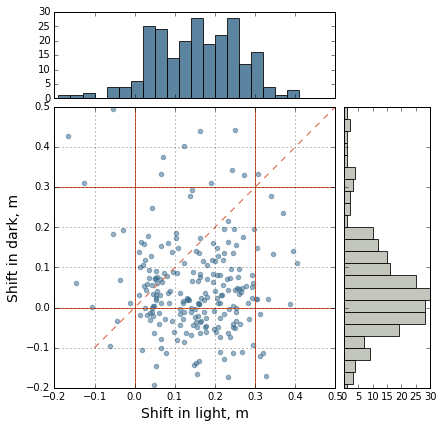

In [84]:
fig = plt.figure(figsize=(6, 6))

x_vals = -1 * (stable['shift_l'] - 0.3)
y_vals = -1 * (stable['shift_d'] - 0.3)

slope, intercept, r_value, p_value, std_err = scipystats.linregress(x_vals, y_vals)
st, pv = scipystats.kruskal(x_vals, y_vals)

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

ax_scatter = fig.add_axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = fig.add_axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = fig.add_axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# heatmap?
xy = np.vstack([x_vals,y_vals])
z = scipystats.gaussian_kde(xy)(xy)
idx = z.argsort()
x1, y1, z1 = x_vals[idx], y_vals[idx], z[idx]
cvals  = [z1.min(), z1.max()]
colors = [COLORS['a'], COLORS['b']]
norm = plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mcolors.LinearSegmentedColormap.from_list("", tuples)

# main plot
ax_scatter.scatter(x_vals, y_vals, color=COLORS['a'], alpha=0.5)
ax_scatter.set_xlim(-0.2, 0.5)
ax_scatter.set_ylim(-0.2, 0.5)
ax_scatter.set_xlabel('Shift in light, m', fontsize=14)
ax_scatter.set_ylabel('Shift in dark, m', fontsize=14)
ax_scatter.plot([-0.1, 0.5], [-0.1, 0.5], ls='--', color=COLORS['b'])
ax_scatter.axvline(0, color=COLORS['b'])
ax_scatter.axvline(0.3, color=COLORS['b'])
ax_scatter.axhline(0, color=COLORS['b'])
ax_scatter.axhline(0.3, color=COLORS['b'])
#ax.plot(x_vals, intercept + slope*x_vals, color=COLORS['a'])
#ax.set_title('slope %.2f (st=%.2f, p=%.3f)' % (slope, st, pv), fontsize=14)
#ax.set_title('Field recalibration in dark', fontsize=14)
ax_scatter.grid()

bins = np.arange(-0.2, 0.5, 0.025)
bins = np.arange(-0.4, 0.6, 0.03)
ax_histx.hist(x_vals, bins=bins, ec='black', color=COLORS['a'], alpha=0.8)
ax_histy.hist(y_vals, bins=bins, ec='black', color=COLORS['f'], alpha=0.8, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

#filename = "02-vSHIFT_recalibration.png"
#fig.savefig(os.path.join(os.path.join(paper), filename))

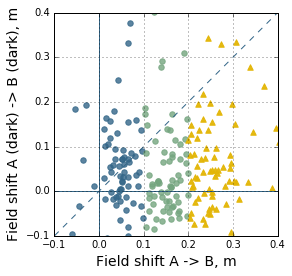

In [85]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111)

x_vals = -1 * (stable['shift_l'] - 0.3)
y_vals = -1 * (stable['shift_d'] - 0.3)

idxs_1 = np.where(x_vals < grps['b'][1])[0]
idxs_2 = np.where((x_vals > grps['h'][0]) & (x_vals < grps['h'][1]))[0]
idxs_3 = np.where(x_vals > grps['v'][0])[0]

ax.scatter(x_vals[idxs_1], y_vals[idxs_1], s=30, color=COLORS['a'], alpha=0.8)
ax.scatter(x_vals[idxs_2], y_vals[idxs_2], s=30, color=COLORS['c'], alpha=0.8)
ax.scatter(x_vals[idxs_3], y_vals[idxs_3], s=30, color=COLORS['d'], alpha=0.95, marker="^")
ax.set_xlim(-0.1, 0.4)
ax.set_ylim(-0.1, 0.4)
ax.set_xlabel('Field shift A -> B, m', fontsize=14)
ax.set_ylabel('Field shift A (dark) -> B (dark), m', fontsize=14)
ax.plot([-0.1, 0.5], [-0.1, 0.5], ls='--', color=COLORS['a'])
ax.axvline(0, color=COLORS['a'])
#ax.axvline(0.3, color=COLORS['b'])
ax.axhline(0, color=COLORS['a'])
#ax.axhline(0.3, color=COLORS['b'])
ax.grid()

filename = "2e.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

In [86]:
len(x_vals[idxs_3]), len(x_vals[idxs_3])/len(x_vals), len(x_vals)

(86, 0.36752136752136755, 234)

### Mean firing rate for visual/self-motion cells

In [48]:
# find a way to classify?
# classify units according to their shift in A-B. if 2 fields, ?

### SUPPL. 3: 7.6% multi-modal (not multisensory) cells having distinct fields driven by different types of input

In [36]:
idxs = get_idxs_by_quality(shift_A_B_all)
dataset = shift_A_B_all[idxs]

unique_units = dataset[['animal','session','electrode', 'unit']].drop_duplicates()

results = []  # contains units with 2 fields, each elem is [field_1_shift, field_2_shift]
for idx, row in unique_units.iterrows():
    idxs_1 = (dataset['animal'] == row['animal'])
    idxs_2 = (dataset['session'] == row['session'])
    idxs_3 = (dataset['electrode'] == row['electrode'])
    idxs_4 = (dataset['unit'] == row['unit'])
    
    fields_df = dataset[idxs_1 & idxs_2 & idxs_3 & idxs_4]
    
    if len(fields_df) > 1:
        results.append([fields_df.iloc[0]['shift'], fields_df.iloc[1]['shift']])
        
shifts = np.array(results)

# filter by difference in shifts - between 0.15 and 0.45 
mmodal_shifts = shifts[(np.diff(shifts)[:, 0] > 0.15) & (np.diff(shifts)[:, 0] < 0.45)]

# total multimodal (MM) units, percentage of MM units, total unique cells
len(mmodal_shifts), len(mmodal_shifts)/float(len(unique_units)), len(unique_units)

# WRONG! count not from total, but from 2 fields! 
# PIE with: % both visual, % both self-motion, % multimodal

(56, 0.07567567567567568, 740)

In [37]:
ds1 = dataset.copy()
ds2 = dataset.copy()

ds1.groupby(['animal', 'session', 'electrode', 'unit'])['field_A'].agg(['count']) == 2

s1 = pd.Series(dataset.groupby(['animal','session','electrode', 'unit']).count()['field_A'])
len(s1[s1==2])

232

In [ ]:
## field sizes - reflection of the input prcision for diff cell types in diff arena locations


animal              session  electrode  unit cond  field_id       sic  \
9   003908  2020-07-01_13-56-13          6     2    A       2.0  1.094258   
14  003908  2020-07-01_13-56-13          6     7    A       1.0  0.419826   
7   003908  2020-07-01_17-18-37          6     5    A       3.0  0.565045   
11  003908  2020-07-02_10-59-57          6     8    A       3.0  0.841603   
16  005363  2020-10-18_14-39-16          4     3    A       3.0  0.313330   

    isol_dist  peak_FR    COMa_x    COMa_y  size  
9   30.330160    7.554 -0.180489 -0.754117    22  
14  32.788366    4.271 -0.146376 -0.891083    28  
7   41.916813    4.043  0.253299 -0.871250    19  
11  30.318516    3.654  0.092218 -0.883937     9  
16  69.288023    1.568 -0.042477 -0.760690    72

In [18]:
k_width = 12
kernel = signal.gaussian(k_width + 1, std=(k_width + 1) / 7.2)

df = shift_A_B_all.copy()
df = df[get_idxs_by_quality(df)]

df_00 = df[(df['shift'] > -0.075) & (df['shift'] < 0.075)]
df_30 = df[(df['shift'] >  0.225) & (df['shift'] < 0.375)]

# get size means
x_min, x_max, step = -0.85, 0.85, 0.1
bins = np.arange(x_min, x_max, step)
mean_sizes = []  # 00, 30, + lonely
sizes = ['size_A', 'size_A', 'size_B', 'size_B', 'size', 'size']

for i, ds in enumerate([df_00, df_30, df_00, df_30, lon_A_B, lon_B_A]):
    means = np.array([ds[(ds['COMa_y'] > b) & (ds['COMa_y'] < b + step)][sizes[i]].median() for b in bins])
    means[np.isnan(means)] = 0
    mean_sizes.append(means)
    
mean_sizes = np.array(mean_sizes)

In [19]:
mean_sizes.shape

(6, 17)

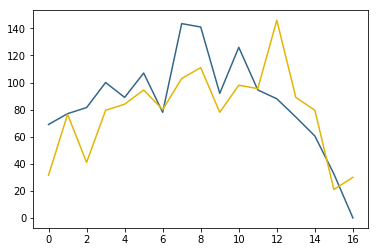

In [22]:
v_00 = mean_sizes[0] + mean_sizes[2] + mean_sizes[4] + mean_sizes[5]
v_30 = mean_sizes[1] + mean_sizes[3]

plt.plot(v_30, color=COLORS['a'])
plt.plot(v_00, color=COLORS['d'])

In [ ]:
plt.scatter(df_00['COMa_y'], df_00['size_A'], color=COLORS['d'], alpha=0.5)
plt.scatter(lon_A_B['COMa_y'], lon_A_B['size'], color=COLORS['d'], alpha=0.5)


plt.scatter(df_30['COMa_y'], df_30['size_A'], color=COLORS['a'], alpha=0.5)

### extention of each field in dark

In [40]:
s_list_single = get_sessions_list(source, animals, 'SHIFT single +dark')
s_list_periodic = get_sessions_list(source, animals, 'SHIFT periodic +dark')
s_comb = list(s_list_single) + (s_list_periodic)

single, periodic, combined = {}, {}, {}
for coll, lst in [[single, s_list_single], [periodic, s_list_periodic], [combined, s_comb]]:
    for cond_A, cond_B in [['A', 'B'], ['A', 'Ad'], ['B', 'Bd']]:
        coll[cond_A + cond_B] = get_fields_between_epochs(source, lst, cond_A, cond_B)

len(single['AB']), len(periodic['AB']), len(combined['AB'])

No required H5 file found for 2020-10-23_12-57-03
PF match found for 332 fields from total 628 A and 646 B fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 279 fields from total 569 A and 601 Ad fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 288 fields from total 573 B and 543 Bd fields
PF match found for 464 fields from total 925 A and 905 B fields
PF match found for 438 fields from total 922 A and 948 Ad fields
PF match found for 437 fields from total 896 B and 895 Bd fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 796 fields from total 1553 A and 1551 B fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 717 fields from total 1491 A and 1549 Ad fields
No required H5 file found for 2020-10-23_12-57-03
PF match found for 725 fields from total 1469 B and 1438 Bd fields


(332, 464, 796)

In [41]:
df_AB  = combined['AB'][get_idxs_by_quality(combined['AB'])]
df_AB = df_AB[get_idxs_of_good_clu(df_AB)]
df_AAd = combined['AAd'][get_idxs_by_quality(combined['AAd'])]
df_AAd = df_AAd[get_idxs_of_good_clu(df_AAd)]
df_BBd = combined['BBd'][get_idxs_by_quality(combined['BBd'])]
df_BBd = df_BBd[get_idxs_of_good_clu(df_BBd)]

df_AB  = combined['AB']
df_AAd = combined['AAd']
df_BBd = combined['BBd']

df_AB['shift'] = (-1) * (df_AB['shift'] - 0.3)
df_AAd['shift'] = (-1) * (df_AAd['shift'] - 0.3)
df_BBd['shift'] = (-1) * (df_BBd['shift'] - 0.3)

df_AB   = df_AB.add_prefix('ab_')
df_AAd  = df_AAd.add_prefix('aad_')
df_BBd  = df_BBd.add_prefix('bbd_')

df_ABAd = df_AB.merge(df_AAd, left_on=['ab_animal', 'ab_session', 'ab_electrode', 'ab_unit', 'ab_field_A'], \
       right_on=['aad_animal', 'aad_session', 'aad_electrode', 'aad_unit', 'aad_field_A'], how='inner')
df_m = df_ABAd.merge(df_BBd, left_on=['ab_animal', 'ab_session', 'ab_electrode', 'ab_unit', 'ab_field_B'], \
       right_on=['bbd_animal', 'bbd_session', 'bbd_electrode', 'bbd_unit', 'bbd_field_A'], how='inner')

print(len(df_m))

485


0.11059846501932752 0.7394638179831416
100.92219526760981 9.566849241242492e-24


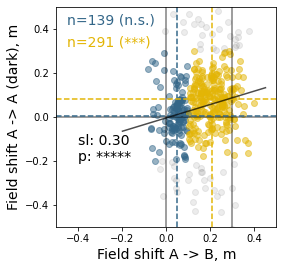

In [43]:
df_00  = df_m[(df_m['ab_shift'] > grps['b'][0]) & (df_m['ab_shift'] < grps['b'][1])]
#df_15 = df_m[(df_m['ab_shift'] > grps['h'][0]) & (df_m['ab_shift'] < grps['h'][1])]
df_30  = df_m[(df_m['ab_shift'] > grps['v'][0]) & (df_m['ab_shift'] < grps['v'][1])]
df_all = df_m.copy()

fig = plt.figure(figsize=(4, 4))
colors = (COLORS['a'], COLORS['d'])

ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-0.5, 0.5)
ax.axvline(0, color='black', alpha=0.5)
ax.axhline(0, color='black', alpha=0.5)
ax.axvline(0.3, color='black', alpha=0.5)
ax.set_aspect('equal')
ax.set_xlabel('Field shift A -> B, m', fontsize=14)
ax.set_ylabel('Field shift A -> A (dark), m', fontsize=14)
#ax.grid()
    
for i, ds in enumerate([df_00, df_30]):  # something weird here! 0 - 30 are swapped
    #x_vals = ds['aad_COMb_y'] - ds['ab_COMa_y']
    #y_vals = ds['bbd_COMb_y'] - ds['ab_COMb_y']
    x_vals = np.array(-1 * ( (ds['ab_COMb_y'] - ds['ab_COMa_y']) - 0.3 ))
    y_vals = np.array(-1 * (ds['aad_COMb_y'] - ds['ab_COMa_y']))
    st, pv = scipystats.kruskal(y_vals, np.zeros(len(y_vals)))
    print(st, pv)
    
    idxs_in  = np.where((y_vals > -0.2) & (y_vals < 0.3))[0]
    idxs_out = np.where((y_vals < -0.2) | (y_vals > 0.3))[0]
    ax.scatter(x_vals[idxs_in], y_vals[idxs_in], color=colors[i], alpha=0.5)
    ax.scatter(x_vals[idxs_out], y_vals[idxs_out], color='grey', alpha=0.15)
    ax.axvline(np.median(x_vals), ls='--', color=colors[i])
    ax.axhline(np.median(y_vals), ls='--', color=colors[i])
    #ax.set_title('st=%.2f, p=%.4f' % (st, pv), fontsize=14)
    txt = '***' if pv < 0.001 else 'n.s.'
    ax.text(-0.45, 0.42 - 0.1*i, 'n=%d (%s)' % (len(y_vals), txt), fontsize=14, color=colors[i])

x_all = np.array(-1 * ((df_all['ab_COMb_y'] - df_all['ab_COMa_y']) - 0.3 ))
y_all = np.array(-1 * (df_all['aad_COMb_y'] - df_all['ab_COMa_y']))
slope, intercept, r_value, p_value, std_err = scipystats.linregress(x_all, y_all)
x_to_plot = np.array([-0.2, 0.45])
ax.plot(x_to_plot, intercept + slope*x_to_plot, color='black', alpha=0.7)
ax.text(-0.4, -0.2, "sl: %.2f\np: *****" % slope, fontsize=14)


fig.tight_layout()
filename = "2g_l.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

In [56]:
dmp = np.column_stack([x_all, y_all])
np.savetxt(os.path.join(os.path.join(paper), "recalibration1.csv"), dmp, delimiter=",", fmt='%5.5f')

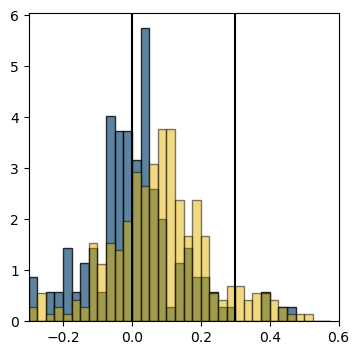

In [37]:
bins = np.arange(-0.4, 0.6, 0.025)
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.hist(-1*(df_00['aad_COMb_y'] - df_00['ab_COMa_y']), bins=bins, alpha=0.8, color=COLORS['a'], ec='black', density=True)
ax.hist(-1*(df_30['aad_COMb_y'] - df_30['ab_COMa_y']), bins=bins, alpha=0.5, color=COLORS['d'], ec='black', density=True)
ax.set_xlim(-0.3, 0.6)
ax.axvline(0, color='black')
ax.axvline(0.3, color='black')

In [ ]:
x_vals

### Argument 3: distribution of the different input modalities across arena

In [14]:
#h5_path = '/storage2/andrey/data/processed/003908/2020-06-23_16-43-19/all.h5'

# mean occupancy for all shift sessions
data = shift_A_B_all[get_idxs_by_quality(shift_A_B_all)][['animal','session']].drop_duplicates()
cond_A = 'A'
cond_B = 'B'

x_min, x_max = -0.4, 0.4
y_min, y_max = -0.85, 0.85
x_range = x_max - x_min
y_range = y_max - y_min
y_bin_count = int(np.ceil(y_range / 0.025))
x_bin_count = int(np.ceil(x_range / 0.025))
pos_range = np.array([[x_min, x_max], [y_min, y_max]])

occup_means = []
for i, row in data.iterrows():
    h5_path = os.path.join(source, row['animal'], row['session'], '%s.h5' % H5NAMES.filebase)
    with h5py.File(h5_path, 'r') as f:
        traj = np.array(f['animal_trajectory'])
        idxs_A = np.array(f['%s_idxs' % cond_A])
        idxs_B = np.array(f['%s_idxs' % cond_B])
        
        pos_A_x = traj[idxs_A][:, 1]
        pos_A_y = traj[idxs_A][:, 2] + 0.15
        pos_B_x = traj[idxs_B][:, 1]
        pos_B_y = traj[idxs_B][:, 2] - 0.15
        
        data_x = np.concatenate([pos_A_x, pos_B_x])
        data_y = np.concatenate([pos_A_y, pos_B_y])

        occup, x_edges, y_edges = np.histogram2d(data_x, data_y, bins=[x_bin_count, y_bin_count], range=pos_range)
        occupancy_map = occup / 100.0  # sampling rate
        occup_means.append(occupancy_map.T.mean(axis=1))
    
occup_means = np.array(occup_means)  # TODO check if orientation is correct
occup_norm = occup_means.mean(axis=0)
#plt.plot(occup_means.mean(axis=0))

In [15]:
bins = np.arange(-0.85, 0.875, 0.025)
d_0 = pd.concat([shift_A_B_all[idxs_0_]['COMa_y'] + 0.15, shift_A_B_all[idxs_0_]['COMb_y'] - 0.15])
d_0 = pd.concat([d_0, lon_A_B['COMa_y'] + 0.15, lon_B_A['COMa_y'] - 0.15])  # don't forget lost fields
d_15 = pd.concat([shift_A_B_all[idxs_15_]['COMa_y'] + 0.15, shift_A_B_all[idxs_15_]['COMb_y'] - 0.15])
d_30 = pd.concat([shift_A_B_all[idxs_30_]['COMa_y'] + 0.15, shift_A_B_all[idxs_30_]['COMb_y'] - 0.15])

vals_0, edges = np.histogram(d_0, bins=bins)
vals_15, edges = np.histogram(d_15, bins=bins)
vals_30, edges = np.histogram(d_30, bins=bins)

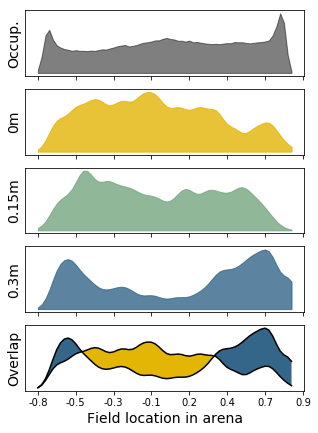

In [18]:
fig = figure(figsize=(5, 7))

k_width = 12
kernel = signal.gaussian(k_width + 1, std=(k_width + 1) / 7.2)
colors = [COLORS['d'], COLORS['c'], COLORS['a']]
labels = ['0m', '0.15m', '0.3m']

# occupancy first
ax = fig.add_subplot(5, 1, 1)
ax.fill_between(np.arange(len(occup_norm)), occup_norm, color='black', alpha=0.5)
ax.tick_params(labelbottom=False)
ax.set_yticks([])
ax.set_ylabel('Occup.', fontsize=14)

# place field density by shift category
values = []
for i, vals in enumerate([vals_0, vals_15, vals_30]):
    ax = fig.add_subplot(5, 1, i+2)
    cvd = np.convolve(vals/occup_norm, kernel, 'same') / kernel.sum()
    values.append(cvd/cvd.sum())
    ax.fill_between(np.arange(len(cvd)), cvd/cvd.sum(), color=colors[i], alpha=0.8)
    ax.tick_params(labelbottom=False)
    ax.set_yticks([])
    ax.set_ylabel(labels[i], fontsize=14)

# cross-domination of one on another category
ax5 = fig.add_subplot(5, 1, 5)
d1 = values[0]
d2 = values[2]
ax5.plot(np.arange(len(d1)), d1, np.arange(len(d2)), d2, color='black')
ax5.fill_between(np.arange(len(d1)), d1, d2, where=d2 >= d1, facecolor=COLORS['a'], interpolate=True)
ax5.fill_between(np.arange(len(d1)), d1, d2, where=d2 <= d1, facecolor=COLORS['d'], interpolate=True)
#ax5.set_xticks(np.arange(6)*10, labels=np.linspace(-0.85, 0.85, 6))
ax5.set_xticklabels(['%.1f' % x for x in np.linspace(-1, 0.9, 9)])
ax5.set_yticks([])
ax5.set_ylabel('Overlap', fontsize=14)
ax5.set_xlabel('Field location in arena', fontsize=14)
#fig.tight_layout()

filename = "02-vSHIFT_domination.png"
fig.savefig(os.path.join(os.path.join(paper), filename))

# DEPRECATED

### gradual remapping by cell type

In [29]:
match_both = np.array(match_both)
c1 = [(match_both < 0.075).sum(), ((match_both > 0.075) & (match_both < 0.225)).sum(), (match_both > 0.225).sum()]
match_A_Ad = np.array(match_A_Ad)
c2 = [(match_A_Ad < 0.075).sum(), ((match_A_Ad > 0.075) & (match_A_Ad < 0.225)).sum(), (match_A_Ad > 0.225).sum()]
match_B_Bd = np.array(match_B_Bd)
c3 = [(match_B_Bd < 0.075).sum(), ((match_B_Bd > 0.075) & (match_B_Bd < 0.225)).sum(), (match_B_Bd > 0.225).sum()]
match_none = np.array(match_none)
c4 = [(match_none < 0.075).sum(), ((match_none > 0.075) & (match_none < 0.225)).sum(), (match_none > 0.225).sum()]

<BarContainer object of 4 artists>

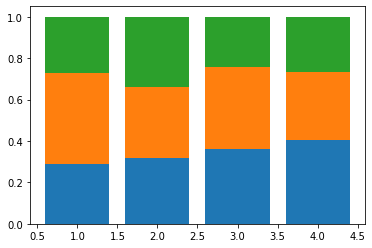

In [30]:
data = np.array([c1, c2, c3, c4], dtype=np.float64)

d1 = data[:, 0]/(data.sum(axis=1))
d2 = data[:, 1]/(data.sum(axis=1))
d3 = data[:, 2]/(data.sum(axis=1))

plt.bar([1, 2, 3, 4], d1)
plt.bar([1, 2, 3, 4], d2, bottom=d1)
plt.bar([1, 2, 3, 4], d3, bottom=d1+d2)

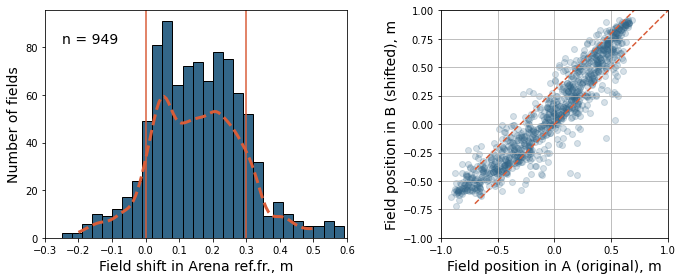

In [40]:
idxs = get_idxs_by_quality(shift_A_B_all)
data = (-1) * (np.array(shift_A_B_all[idxs]['shift']) - 0.3)
pos_A = np.array(shift_A_B_all[idxs]['COMa_y'])
pos_B = np.array(shift_A_B_all[idxs]['COMb_y'])
bins = np.arange(-0.4, 0.6, 0.03)

fig = figure(figsize=(10, 4))

# histogram of COM shifts
ax = fig.add_subplot(121)
ax.set_xlim(-0.3, 0.6)
ax.hist(data, bins=bins, color=COLORS['a'], ec='black')
ax.axvline(0, color=COLORS['b'])
ax.axvline(0.3, color=COLORS['b'])
ax.set_xlabel('Field shift in Arena ref.fr., m', fontsize=14)
ax.set_ylabel('Number of fields', fontsize=14)
ax.text(-0.25, 0.9 * np.histogram(data, bins)[0].max(), 'n = %d' % len(data), fontsize=14)
ker = scipystats.gaussian_kde(data, bw_method=0.15)
x_vals = np.linspace(-0.2, 0.5, 100)
ax.plot(x_vals, 20*ker(x_vals), color=COLORS['b'], lw=3, ls='--')

ax = fig.add_subplot(122)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
ax.grid()
ax.scatter(pos_A, pos_B, alpha=0.2, color=COLORS['a'])
line = np.linspace(-0.7, 1.0, 10)
ax.plot(line, line, ls='--', color=COLORS['b'], label='no change line')
ax.plot(line, line + 0.3, ls='--', color=COLORS['b'], label='no change line')
ax.set_xlabel('Field position in A (original), m', fontsize=14)
ax.set_ylabel('Field position in B (shifted), m', fontsize=14)
fig.tight_layout()

# maybe fill with gradient
# https://stackoverflow.com/questions/51347451/how-to-fill-histogram-with-color-gradient-where-a-fixed-point-represents-the-mid

#filename = "02-vSHIFT_histogram_all_physical.png"
#fig.savefig(os.path.join(os.path.join(paper), filename))

### neuron quality

In [240]:
df = shift_A_B_all.copy()
df['shift'] = (-1) * (df['shift'] - 0.3)

#df = df[get_idxs_of_good_clu(df)]

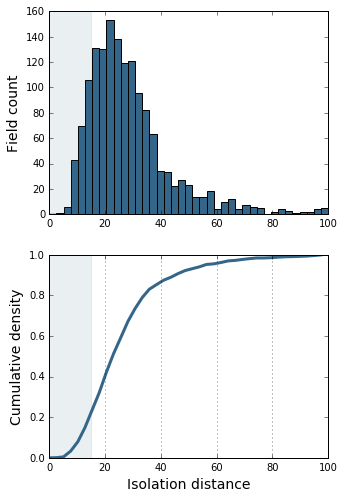

In [242]:
# isolation distance

fig, axes = plt.subplots(2, 1)
fig.set_figheight(8)
fig.set_figwidth(5)

bins = np.linspace(0, 100, 40)
vals = axes[0].hist(df[df['isol_dist'].notnull()]['isol_dist'], bins=bins, color=COLORS['a'])
axes[0].set_xlim(0, 100)
axes[1].plot(vals[1][:-1], vals[0].cumsum()/vals[0].sum(), lw=3, color=COLORS['a'])
axes[1].set_xlim(0, 100)
axes[1].xaxis.grid()
axes[0].axvspan(0, 15, alpha=0.1, color=COLORS['a'])
axes[1].axvspan(0, 15, alpha=0.1, color=COLORS['a'])

axes[0].set_ylabel('Field count', fontsize=14)
axes[1].set_ylabel('Cumulative density', fontsize=14)
axes[1].set_xlabel('Isolation distance', fontsize=14)

filename = "E_5b.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

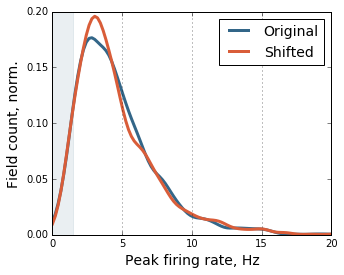

In [243]:
## TODO - filter only good clusters!
## TODO do for all units!!

# peak firing rate KDE for A/B

fig, ax = plt.subplots(1, 1)
fig.set_figheight(4)
fig.set_figwidth(5)

#bins = np.linspace(0, 20, 30)
#ax.hist(df['peak_FR_A'], bins=bins)
#ax.set_xlim(0, 20)

x_vals = np.linspace(0, 20, 100)
ker_A = scipystats.gaussian_kde(df['peak_FR_A'], bw_method=0.15)
ker_B = scipystats.gaussian_kde(df['peak_FR_B'], bw_method=0.15)

ax.plot(x_vals, ker_A(x_vals), color=COLORS['a'], lw=3, label='Original')
ax.plot(x_vals, ker_B(x_vals), color=COLORS['b'], lw=3, label='Shifted')
ax.axvspan(0, 1.5, alpha=0.1, color=COLORS['a'])
ax.set_xlabel('Peak firing rate, Hz', fontsize=14)
ax.set_ylabel('Field count, norm.', fontsize=14)
ax.legend(loc='upper right', fontsize=14)
ax.xaxis.grid()

filename = "E_5c_1.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

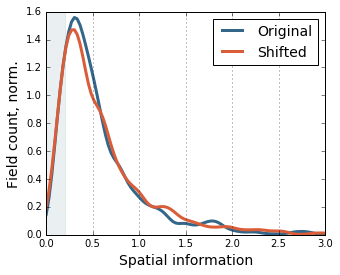

In [244]:
fig, ax = plt.subplots(1, 1)
fig.set_figheight(4)
fig.set_figwidth(5)

x_vals = np.linspace(0, 3, 100)
ker_A = scipystats.gaussian_kde(df['sic_A'], bw_method=0.15)
ker_B = scipystats.gaussian_kde(df['sic_B'], bw_method=0.15)

ax.plot(x_vals, ker_A(x_vals), color=COLORS['a'], lw=3, label='Original')
ax.plot(x_vals, ker_B(x_vals), color=COLORS['b'], lw=3, label='Shifted')
ax.axvspan(0, 0.2, alpha=0.1, color=COLORS['a'])
ax.set_xlabel('Spatial information', fontsize=14)
ax.set_ylabel('Field count, norm.', fontsize=14)
ax.legend(loc='upper right', fontsize=14)
ax.set_xlim(0, 3)
ax.xaxis.grid()

filename = "E_5c_2.pdf"
fig.savefig(os.path.join(os.path.join(paper), filename))

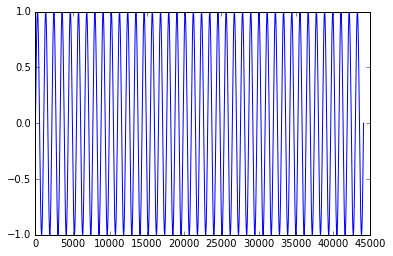

In [63]:
sample_rate = 44100  # sampling rate
freq = 440  # Hz
duration = 1  # one sec
one_sec_pure_tone = np.sin(np.linspace(0, 2 * np.pi * freq * duration, int(duration*sample_rate)))